In [1]:
import numpy as np
import matplotlib.pyplot as plt
import linecache
import math
import tensorflow as tf
from tensorflow.python.framework import ops

In [2]:
# initialize mode params
num_mode=3
ny=161
nz=23
y=np.zeros((ny,1))
z=np.zeros((nz,1))
data1=np.zeros((ny,nz))
data2=np.zeros((ny,nz))
mode_data=[['' for i in range(3)] for j in range(2)]

In [3]:
# get mode1-3 E and H data
j=0
for i in range(3+1,3+1+ny):
    y[j,:]=linecache.getline(r'C:\Users\Ang Liu\Desktop\Mode_data\mode1_ey.txt', i).split()
    j+=1

j=0
for i in range(3+ny+2+1,3+ny+2+1+nz):
    z[j,:]=linecache.getline(r'C:\Users\Ang Liu\Desktop\Mode_data\mode1_ey.txt', i).split()
    j+=1

for k in range(num_mode):
    j=0
    for i in range(3+ny+2+nz+2+1,3+ny+2+nz+2+1+ny):
        data1[j,:]=linecache.getline(r'C:\Users\Ang Liu\Desktop\Mode_data\mode'+str(k+1)+'_ey.txt', i).split()
        data2[j,:]=linecache.getline(r'C:\Users\Ang Liu\Desktop\Mode_data\mode'+str(k+1)+'_hz.txt', i).split()
        j+=1  
    mode_data[0][k]=np.copy(data1.T)
    mode_data[1][k]=np.copy(data2.T)

# Normlize mode energy to 1
dy=(y[-1,0]-y[0,0])/(y.shape[0]-1)
dz=(z[-1,0]-z[0,0])/(z.shape[0]-1)
norm_mode=np.zeros((1,num_mode))
for i in range(num_mode):
    norm_mode[0,i]=np.sum(mode_data[0][i]*mode_data[1][i]*dy*dz)/2
    mode_data[0][i]/=np.sqrt(norm_mode[0,i])
    mode_data[1][i]/=np.sqrt(norm_mode[0,i])

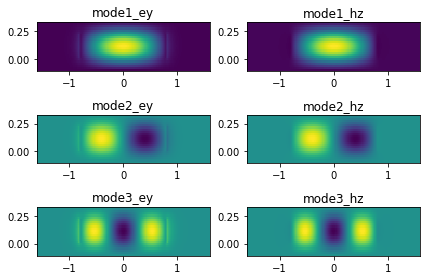

In [4]:
# show three modes (Ey and Hz)
# generate 2d grids for y and z
yy,zz=np.meshgrid(y,z)
plt.figure()
for i in range(num_mode):
    plt.subplot(num_mode, 2, 2*i+1)
    plt.title('mode{}_ey'.format(i+1))
    plt.pcolormesh(yy,zz,mode_data[0][i])
    plt.subplot(num_mode, 2, 2*i+2)
    plt.title('mode{}_hz'.format(i+1))
    plt.pcolormesh(yy,zz,mode_data[1][i])
plt.tight_layout()
plt.show()

In [5]:
# Synthesis data set
m_all=300 # number of all the samples
pert=0.05 # perturbation of intensity after field's superposition
field_sp=[[0 for i in range(m_all)] for j in range(2)] # [[Ey(0),...,Ey(m_all-1)],[Hz(0),...,Hz(m_all-1)]]
np.random.seed(0) # random seed(0)
rd1=np.random.rand(3,m_all)
np.random.seed(1) # random seed(1)
rd2=np.random.rand(3,m_all)
mode_comp=rd1*np.exp(1j*rd2*2*np.pi)
mode_comp_label=rd1**2/np.sum(rd1**2,axis=0)
for i in range(m_all):
    for j in range(num_mode):
        field_sp[0][i]+=mode_comp[j,i]*mode_data[0][j]
        field_sp[1][i]+=mode_comp[j,i]*mode_data[1][j]

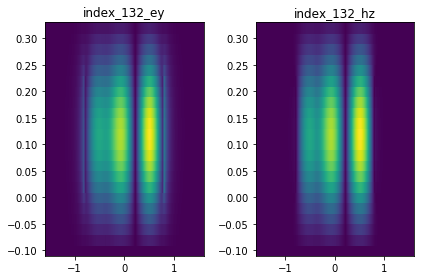

In [6]:
# view specified sample
index=132
plt.figure()
plt.subplot(1, 2, 1)
plt.title('index_{}_ey'.format(index))
plt.pcolormesh(yy,zz,np.abs(field_sp[0][index]))
plt.subplot(1, 2, 2)
plt.title('index_{}_hz'.format(index))
plt.pcolormesh(yy,zz,np.abs(field_sp[1][index]))
plt.tight_layout()
plt.show()

In [ ]:
# Group report
index=132
plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
plt.title('index_{}_|ey|'.format(index))
plt.pcolormesh(yy,zz,np.log10(np.abs(field_sp[0][index])/np.max(np.abs(field_sp[0][index]),axis=0)))
plt.xlabel("Y direction/micron")
plt.ylabel("Z direction/micron")
plt.ylim(-0.11, 0.33)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(orientation='horizontal')
plt.show()

In [ ]:
# Group report
# show three modes (Ey and Hz)
# generate 2d grids for y and z
yy,zz=np.meshgrid(y,z)
plt.figure(num=None, figsize=(4,4), dpi=80, facecolor='w', edgecolor='k')
for i in range(num_mode):
    plt.subplot(num_mode,1,i+1)
    plt.title('mode_{}_|ey|'.format(i+1))
    plt.pcolormesh(yy,zz,mode_data[0][i])
    plt.xlabel("Y direction/micron")
    plt.ylabel("Z direction/micron")
    plt.ylim(-0.11, 0.33)
    plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [7]:
# get farfield diffraction pattern
sp_y=y.shape[0] # sampling points along y
sp_z=z.shape[0] # sampling points along z
ff_data=[]
for i in range(m_all):
    ff_data.append(np.fft.fftshift(np.fft.fft2(field_sp[0][i]))/sp_y/sp_z)

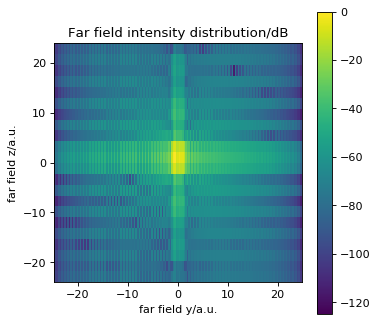

In [8]:
# view specified farfield pattern
sl_y=dy # sampling length(unit) along y
sl_z=dz # sampling length(unit) along z
sf_y=1/dy # sampling frequency along y
sf_z=1/dz # sampling frequency along z
f_y=np.fft.fftshift(np.fft.fftfreq(sp_y,sl_y))
f_z=np.fft.fftshift(np.fft.fftfreq(sp_z,sl_z))
index=132
plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
plt.pcolormesh(f_y,f_z,20*np.log10(np.abs(ff_data[index])/np.max(np.abs(ff_data[index]))))
plt.title('Far field intensity distribution/dB')
plt.xlabel('far field y/a.u.')
plt.ylabel('far field z/a.u.')
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

In [9]:
X_train=np.abs(ff_data[:200])**2
X_train=X_train.reshape(200,-1).T
X_test=np.abs(ff_data[200:300])**2
X_test=X_test.reshape(100,-1).T
Y_train=mode_comp_label[:,:200]
Y_test=mode_comp_label[:,200:300]

In [10]:
# data analysis
# _,X_train_vars=tf.nn.moments(X_train)

In [11]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32,[n_x,None])
    Y = tf.placeholder(tf.float32,[n_y,None])
    return X, Y

In [12]:
def initialize_parameters(parameters=None):
    if parameters==None:
        tf.set_random_seed(2)      
        W1 = tf.get_variable("W1", [25,3703], initializer = tf.contrib.layers.xavier_initializer(seed = 3))
        b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
        W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 4))
        b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
        W3 = tf.get_variable("W3", [3,12], initializer = tf.contrib.layers.xavier_initializer(seed = 5))
        b3 = tf.get_variable("b3", [3,1], initializer = tf.zeros_initializer())
    else:
        W1 = tf.get_variable("W1", [25,3703], initializer = tf.constant(parameters['W1']))
        b1 = tf.get_variable("b1", [25,1], initializer = tf.constant(parameters['b1']))
        W2 = tf.get_variable("W2", [12,25], initializer = tf.constant(parameters['W2']))
        b2 = tf.get_variable("b2", [12,1], initializer = tf.constant(parameters['b2']))
        W3 = tf.get_variable("W3", [3,12], initializer = tf.constant(parameters['W3']))
        b3 = tf.get_variable("b3", [3,1], initializer = tf.constant(parameters['b3']))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [13]:
def forward_propagation(X, parameters):   
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.matmul(W1,X) + b1                                              # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.tanh(Z1)                                              # A1 = tanh(Z1)
    Z2 = tf.matmul(W2,A1) + b2                                              # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.tanh(Z2)                                              # A2 = tanh(Z2)
    Z3 = tf.matmul(W3,A2) + b3                                              # Z3 = np.dot(W3,Z2) + b3
   
    return Z3

In [14]:
def compute_cost1(Z3, Y):
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    Z3 = tf.transpose(Z3)
    Y = tf.transpose(Y)
    A3 = tf.nn.softmax(Z3)
    cost = tf.reduce_mean(tf.reduce_sum(tf.abs(Y-A3),axis=1))
    
    return cost

In [15]:
def compute_cost2(Z3, Y):
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    Z3 = tf.transpose(Z3)
    Y = tf.transpose(Y)
    A3 = tf.nn.softmax(Z3)
    cost = tf.reduce_mean(tf.reduce_sum((Y-A3)**2,axis=1))
    
    return A3.T,cost

In [16]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [17]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    seed = 6                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    # cost1 = compute_cost1(Z3, Y) # L1 norm
    _,cost2 = compute_cost2(Z3, Y) # L2 norm
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost2)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost2], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        print ("Train mean square error:", sess.run(cost2,feed_dict={X: X_train, Y: Y_train}))
        print ("Test mean square error:", sess.run(cost2,feed_dict={X: X_test, Y: Y_test}))
        
        return parameters

In [ ]:
def model_check(X_train, Y_train, X_test, Y_test, parameters=None, print_cost = True):
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters(parameters)
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    # cost1 = compute_cost1(Z3, Y) # L1 norm
    A3,cost2 = compute_cost2(Z3, Y) # L2 norm
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        sess.run([A3, cost2], feed_dict={X: X_train, Y: Y_train})
        
        
        return parameters

Cost after epoch 0: 0.201627
Cost after epoch 100: 0.009455
Cost after epoch 200: 0.004507
Cost after epoch 300: 0.002892
Cost after epoch 400: 0.002113
Cost after epoch 500: 0.001607
Cost after epoch 600: 0.001118
Cost after epoch 700: 0.001080
Cost after epoch 800: 0.001986
Cost after epoch 900: 0.000793
Cost after epoch 1000: 0.000744
Cost after epoch 1100: 0.000537
Cost after epoch 1200: 0.000465
Cost after epoch 1300: 0.000573
Cost after epoch 1400: 0.000704
Cost after epoch 1500: 0.000447
Cost after epoch 1600: 0.000492
Cost after epoch 1700: 0.000344
Cost after epoch 1800: 0.000305
Cost after epoch 1900: 0.000880
Cost after epoch 2000: 0.000602
Cost after epoch 2100: 0.000359
Cost after epoch 2200: 0.000325
Cost after epoch 2300: 0.000291
Cost after epoch 2400: 0.000518
Cost after epoch 2500: 0.000636
Cost after epoch 2600: 0.000387
Cost after epoch 2700: 0.000518
Cost after epoch 2800: 0.000550
Cost after epoch 2900: 0.000399


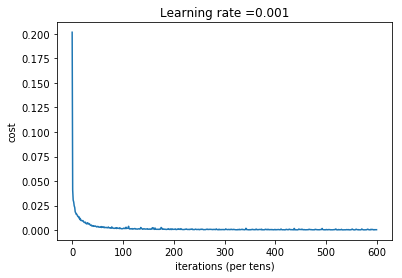

Parameters have been trained!
Train mean square error: 0.000422935
Test mean square error: 0.00936415


In [18]:
parameters=model(X_train, Y_train, X_test, Y_test, learning_rate = 0.001,
          num_epochs = 3000, minibatch_size = 16, print_cost = True)

In [ ]:
parameters=model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0005,
          num_epochs = 3000, minibatch_size = 16, print_cost = True)

In [ ]:
parameters=model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0008,
          num_epochs = 3000, minibatch_size = 16, print_cost = True)